In [ ]:
'''
surfplot_t_test_reg_sqrR2.ipynb
Fig6A. visualize model pairs t-test for multiple regression
Oct 2024 Jane
'''

In [1]:
# import
from neuromaps.datasets import fetch_fsaverage
from surfplot import Plot
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def draw_t_test(model, save_f, color_range=(-.30,.30), views=None, cmap='RdYlBu_r'):
    #other cmap options: 'Spectral' 'bwr_r' 'coolwarm_r'
    surfaces = fetch_fsaverage(density='41k')
    lh, rh = surfaces['inflated']
    
    mask_rh = np.load('./cortical_mask_rh.npy')
    mask_lh = np.load('./cortical_mask_lh.npy')

    # surface of sqrR2
    # from /backup/data/social_actions/fmri/pymvpa/
    sl_lh = nib.load(f'./t_test_reg_{model}_sqrR2_lh.gii').agg_data()
    sl_rh = nib.load(f'./t_test_reg_{model}_sqrR2_rh.gii').agg_data()

    mean_lh = sl_lh.copy() #use .copy()!
    mean_rh = sl_rh.copy()

    p = Plot(surf_lh=lh, surf_rh=rh, views=views, brightness=0.7, zoom=1.58, size=(500, 375))
    p.add_layer({'left': mean_lh, 'right': mean_rh}, cmap=cmap,
                color_range=color_range)
    
    cbar_kws = dict(location='right', draw_border=False, aspect=10,
                    shrink=.3, decimals=3, pad=0)
    fig = p.build(scale=(3, 3), cbar_kws=cbar_kws)
    
    print(f'{model}: max={np.nanmax(np.concatenate((mean_lh, mean_rh)))} min={np.nanmin(np.concatenate((mean_lh, mean_rh)))}')
    print(f'*thresholded with p = 0.05 in previous steps')
    
    # save fig
    plt.savefig(save_f, dpi=300, transparent=True, bbox_inches='tight')
    print(f'saved {save_f}')

ts-ops: max=0.19822829961776733 min=-0.04822344332933426
*thresholded with p = 0.05 in previous steps
saved ./plot/t_test_ts-ops_sqrR2_lm.png


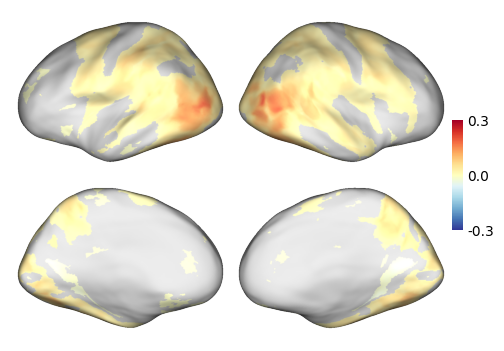

In [16]:
model = 'ts-ops'
save_f = f'./plot/t_test_{model}_sqrR2_lm.png'
draw_t_test(model, save_f, color_range=(-.3, .3))

ts-ops: max=0.19822829961776733 min=-0.04822344332933426
*thresholded with p = 0.05 in previous steps
saved ./plot/t_test_ts-ops_sqrR2_v.png


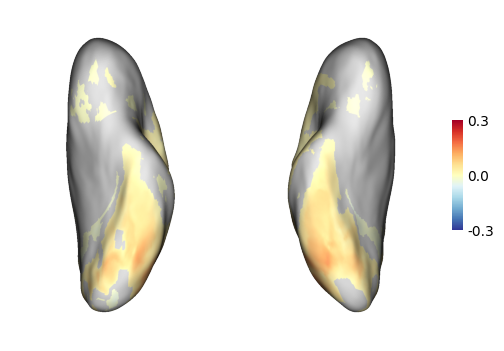

In [17]:
model = 'ts-ops'
save_f = f'./plot/t_test_{model}_sqrR2_v.png'
draw_t_test(model, save_f, color_range=(-.3, .3), views='ventral')

ts-ops: max=0.19822829961776733 min=-0.04822344332933426
*thresholded with p = 0.05 in previous steps
saved ./plot/t_test_ts-ops_sqrR2_p.png


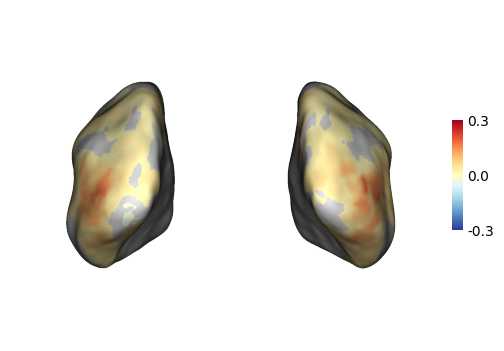

In [15]:
model = 'ts-ops'
save_f = f'./plot/t_test_{model}_sqrR2_p.png'
draw_t_test(model, save_f, color_range=(-.3, .3), views='posterior')

mg-ts: max=0.16514983773231506 min=-0.3059673309326172
*thresholded with p = 0.05 in previous steps
saved ./plot/t_test_mg-ts_sqrR2_lm.png


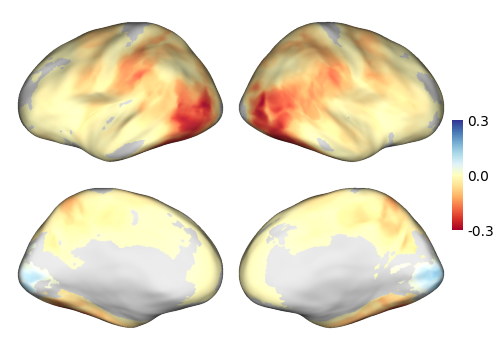

In [4]:
model = 'mg-ts'
save_f = f'./plot/t_test_{model}_sqrR2_lm.png'
draw_t_test(model, save_f, color_range=(-.3, .3), cmap='RdYlBu')

mg-ts: max=0.16514983773231506 min=-0.3059673309326172
*thresholded with p = 0.05 in previous steps
saved ./plot/t_test_mg-ts_sqrR2_v.png


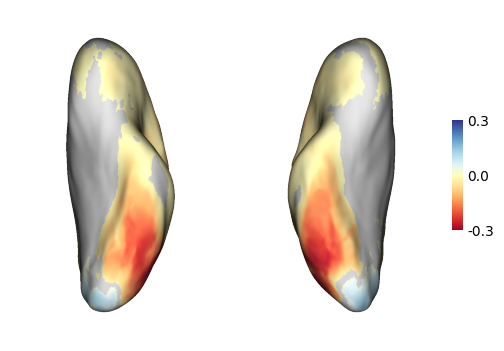

In [5]:
model = 'mg-ts'
save_f = f'./plot/t_test_{model}_sqrR2_v.png'
draw_t_test(model, save_f, color_range=(-.3, .3), views='ventral', cmap='RdYlBu')

mg-ts: max=0.16514983773231506 min=-0.3059673309326172
*thresholded with p = 0.05 in previous steps
saved ./plot/t_test_mg-ts_sqrR2_p.png


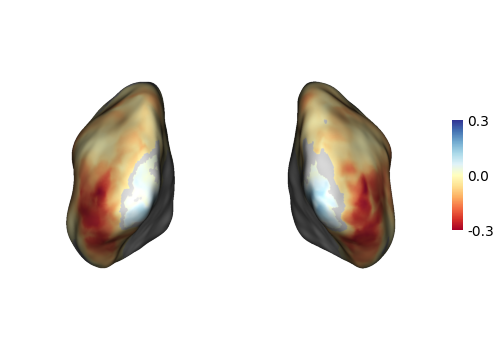

In [6]:
model = 'mg-ts'
save_f = f'./plot/t_test_{model}_sqrR2_p.png'
draw_t_test(model, save_f, color_range=(-.3, .3), views='posterior', cmap='RdYlBu')